<a href="https://colab.research.google.com/github/qhumphrey/Assignment4/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                 Model Parameter Name   Symbol         Value
0        Birth rate of the human population (days^-1)        b      0.000180
1                  Natural human death rate (days^-1)       mu      0.000046
2                        Human life expectancy (days)      hle  21915.406531
3   Natural death rate of pathogens in the environ...      mup      0.172400
4   Life expectancy of pathogens in the environmen...     lepe      5.800464
5   Proportion of interaction with an infectious e...  alpha_1      0.100000
6   Proportion of interaction with an infectious i...  alpha_2      0.050000
7   Rate of transmission from S to E due to contac...   beta_1      0.004140
8   Rate of transmission from S to E due to contac...   beta_2      0.011500
9         Proportion of symptomatic infectious people    delta      0.700000
10  Progression rate from E back to S due to robus...      psi      0.005100
11       Progression rate from E to either I_A or I_S    omega      0.090000

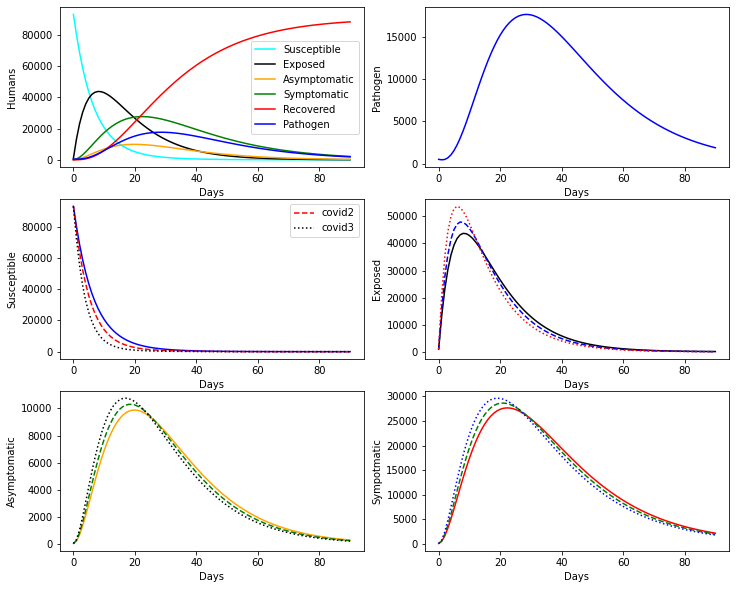

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Model Parameters
b = 0.00018 # birth rate per day
mu = 0.00004563 # natural human death rate per day
hle = 1/mu # human life expectancy
mup =  0.1724 # Natural death rate of pathogens in the environment (days^-1)
lepe = 1/mup # Life expectancy of pathogens in the environment (days)
alpha_1 = 0.10 # Proportion of interaction with an infectious environment 
alpha_2 = 0.10 # Proportion of interaction with an infectious individuals
beta_1 = 0.00414 # Rate of transmission from S to E due to contact with P
beta_2 = 0.0115 # Rate of transmission from S to E due to contact with I_A and I_S
delta = 0.7 # Proportion of symptomatic infectious people
psi = 0.0051 # Progression rate from E back to S due to robust immune system
omega = 0.09 # Progression rate from E to either I_A or I_S
sigma = 0.0018 # Death rate due to the coronavirus
gamma_s = 0.05 # Rate of recovery of the symptomatic human population
gamma_a = 0.0714 # Rate of recovery of the asymptomatic human population
eta_s = 0.1 # Rate of virus spread to environment by symptomatic infectious individuals (days^-1)
eta_a = 0.05 # Rate of virus spread to environment by asymptomatic infectious individuals (days^-1)


# initial values
E0 = 1000; # Exposed
I_S0 = 50; # Symptomatic infectious
I_A0 = 50; # Asymptomatic infectious
R0 = 0; # Recovered
S0 = 93000; # Susceptible
P0 = 500; # Pathogens present

x0 = [S0,E0,I_A0,I_S0,R0,P0]

# Define the function based on the given variables and the ordinary differential equations
def covid(x,t):
    S,E,I_A,I_S,R,P = x
    dx = np.zeros(6)
    dx[0] = b - ((beta_1*S*P)/(1 + alpha_1*P)) - ((beta_2*S*(I_A + I_S))/(1 + alpha_2*(I_A + I_S))) + psi*E - mu*S
    dx[1] = ((beta_1*S*P)/(1 + alpha_1*P)) + ((beta_2*S*(I_A + I_S))/(1 + alpha_2*(I_A + I_S))) - psi*E - mu*E - omega*E
    dx[2] = (1 - delta)*omega*E - (mu + sigma)*I_A - gamma_a*I_A
    dx[3] = delta*omega*E - (mu + sigma)*I_S - gamma_s*I_S
    dx[4] = gamma_s*I_S +gamma_a*I_A - mu*R
    dx[5] = eta_a*I_A + eta_s*I_S - mup*P
    return dx

t = np.linspace(0, 90, 91)
x = odeint(covid,x0,t)
S = x[:,0];
E = x[:,1]; 
I_A = x[:,2]; 
I_S = x[:,3];
R = x[:,4];
P = x[:,5];

# Effects of constants alpha_1 and alpha_2
alpha1 = np.zeros(2)
alpha2 = np.zeros(2)

# Adjust proportion when alpha 1 or alpha 2 doesnt equal 0.1
for i in range(2):
    if i == 0:
        alpha1[i] = 0.05
        alpha2[i] = 0.1
    elif i == 1:
        alpha1[i] = 0.1
        alpha2[i] = 0.05
        
# condition when i = 0      
alpha_1=alpha1[0]
alpha_2=alpha2[0]
covid2 = odeint(covid,x0,t)
S2 = covid2[:,0]
E2 = covid2[:,1]
I_A2 = covid2[:,2]
I_S2 = covid2[:,3]

# condition when i = 1
alpha_1 = alpha1[1]
alpha_2 = alpha2[1]
covid3 = odeint(covid,x0,t)
S3 = covid3[:,0]
E3 = covid3[:,1]
I_A3 = covid3[:,2]
I_S3 = covid3[:,3]

# plotting the data and recreating six subplots
fig, axs = plt.subplots(3,2, figsize = (12,10))
axs[0,0].plot(t,S, 'cyan', Label='Susceptible')
axs[0,0].plot(t,E, 'black', Label='Exposed')
axs[0,0].plot(t,I_A, 'orange', Label='Asymptomatic')
axs[0,0].plot(t,I_S, 'green', Label='Symptomatic')
axs[0,0].plot(t,R, 'red', Label='Recovered')
axs[0,0].plot(t,P, 'blue', Label='Pathogen')
axs[0,0].legend()
axs[0,0].set_ylabel('Humans')
axs[0,0].set_xlabel('Days')

axs[0,1].plot(t,P, 'blue')
axs[0,1].set_ylabel('Pathogen')
axs[0,1].set_xlabel('Days')

axs[1,0].plot(t,S, 'blue')
axs[1,0].plot(t,S2, 'r--', Label='covid2')
axs[1,0].plot(t,S3, 'k:', Label='covid3')
axs[1,0].set_ylabel('Susceptible')
axs[1,0].set_xlabel('Days')
axs[1,0].legend()

axs[1,1].plot(t,E, 'black')
axs[1,1].plot(t,E2, 'b--')
axs[1,1].plot(t,E3, 'r:')
axs[1,1].set_ylabel('Exposed')
axs[1,1].set_xlabel('Days')

axs[2,0].plot(t,I_A, 'orange')
axs[2,0].plot(t,I_A2, 'g--')
axs[2,0].plot(t,I_A3, 'k:')
axs[2,0].set_ylabel('Asymptomatic')
axs[2,0].set_xlabel('Days')

axs[2,1].plot(t,I_S, 'red')
axs[2,1].plot(t,I_S2, 'g--')
axs[2,1].plot(t,I_S3, 'b:')
axs[2,1].set_ylabel('Sympotmatic')
axs[2,1].set_xlabel('Days')

# Compute the basic reproduction numbers for humans and pathogens given the equations
C1 = psi + mu + omega
C2 = mu + sigma + gamma_s
C3 = mu + sigma + gamma_a

Rh0 = ((beta_2*b)/(mu*C1))*((delta*omega)/C2 + (1-delta)*omega/C3)
Rp0 = ((beta_1*b)/(mu*mup*C1))*((eta_s*delta*omega)/C2 + (eta_a*(1 - delta)*omega)/C3)

# Create a table for the input variables as well as the computed values for
# the basic reproduction numbers for humans and pathogens
import pandas as pd

a = [ ["Birth rate of the human population (days^-1)", "b", b],
       ["Natural human death rate (days^-1)", "mu", mu],
       ["Human life expectancy (days)", "hle", hle],
       ["Natural death rate of pathogens in the environment (days^-1)","mup",mup],
       ["Life expectancy of pathogens in the environment (days)","lepe",lepe],
       ["Proportion of interaction with an infectious environment","alpha_1",alpha_1],
       ["Proportion of interaction with an infectious individual","alpha_2",alpha_2],
       ["Rate of transmission from S to E due to contact with P","beta_1",beta_1],
       ["Rate of transmission from S to E due to contact with I_A and/or I_S","beta_2",beta_2],
       ["Proportion of symptomatic infectious people","delta",delta],
       ["Progression rate from E back to S due to robust immune system","psi",psi],
       ["Progression rate from E to either I_A or I_S","omega",omega],
       ["Death rate due to the coronavirus","sigma",sigma],
       ["Rate of recovery of the symptomatic human population (days^-1)","gamma_s",gamma_s],
       ["Rate of recovery of the asymptomatic human population (days^-1)","gamma_a",gamma_a],
       ["Rate of virus spread to environment by symptomatic infectious individuals (days^-1)","eta_s",eta_s],
       ["Rate of virus spread to environment by asymptomatic infectious individuals (days^-1)","eta_a",eta_a]]
da = pd.DataFrame(a,columns = ["Model Parameter Name", "Symbol", "Value"])
# da.to_csv ('ModelParameters.csv') 
print(da)

d = [ ["Humans", Rh0],
     ["Pathogens", Rp0]]

df = pd.DataFrame(d,columns = ["Name","Basic Reproduction Numbers"])
# df.to_csv('BasicReproductionNumbers.csv')
print(df)